---
# pRF ses-2 (sub-007)

This notebook aims to unravel the frequency domain of our pRF-design, on which we can then base our filtering operations

In [1]:
from linescanning import utils, plotting
from pRFline import fitting
import numpy as np
import warnings
import matplotlib.pyplot as plt
import os
opj = os.path.join

warnings.simplefilter('ignore')
project_dir = os.environ.get("DIR_PROJECTS")
base_dir = os.path.join(project_dir, 'VE-pRF')
deriv_dir = opj(base_dir, 'derivatives')

plot_vox = 359
plot_xkcd = False
np.set_printoptions(precision=3)


220518-09:18:40,72 nipype.utils WARNING:
	 A newer version (1.8.1) of nipy/nipype is available. You are using 1.7.0


In [28]:
# Load data
sub         = '007'
ses         = 2
task        = "task-pRF"
run         = [1,2,3]
func_dir    = opj(base_dir, f"sub-{sub}", f"ses-{ses}", "func")
anat_dir    = opj(base_dir, f"sub-{sub}", f"ses-{ses}", "anat")
prf_new     = opj(base_dir, 'derivatives', 'prf', f"sub-{sub}", f"ses-{ses}")
ribbon      = [357,364]

if not os.path.exists(prf_new):
    os.makedirs(prf_new, exist_ok=True)

In [67]:
pars = utils.get_file_from_substring(["model-norm", "stage-iter", "params"], prf_new)
results = fitting.pRFResults(pars, verbose=True)

Loading in files:
 pRF params:    /data1/projects/MicroFunc/Jurjen/projects/VE-pRF/derivatives/prf/sub-007/ses-2/sub-007_ses-2_run-avg_model-norm_stage-iter_desc-prf_params.npy
 Design matrix: /data1/projects/MicroFunc/Jurjen/projects/VE-pRF/derivatives/prf/sub-007/ses-2/sub-007_ses-2_run-avg_desc-design_matrix.npy
 fMRI data:     /data1/projects/MicroFunc/Jurjen/projects/VE-pRF/derivatives/prf/sub-007/ses-2/sub-007_ses-2_run-avg_desc-data.npy
Setting rsq-threshold to default value: 0.1
Using settings file: /data1/projects/MicroFunc/Jurjen/projects/VE-pRF/derivatives/prf/sub-007/ses-2/20220503_model-norm_desc-settings.yml
Predictions: /data1/projects/MicroFunc/Jurjen/projects/VE-pRF/derivatives/prf/sub-007/ses-2/sub-007_ses-2_run-avg_model-norm_stage-iter_desc-predictions.npy


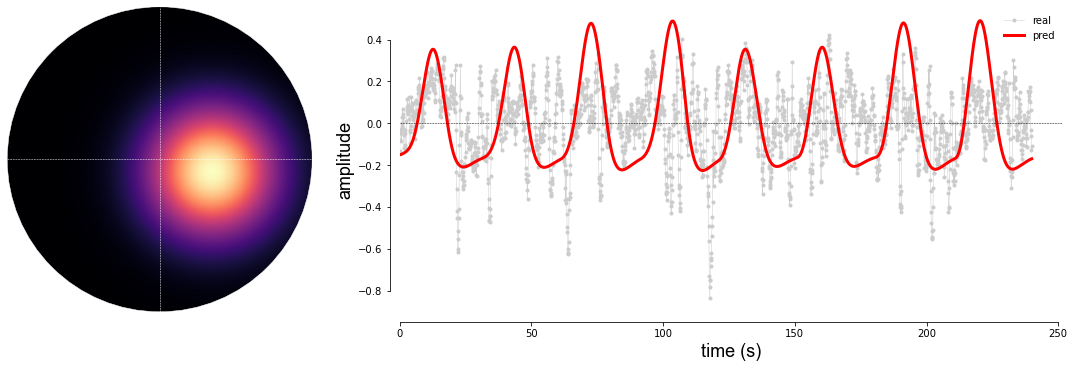

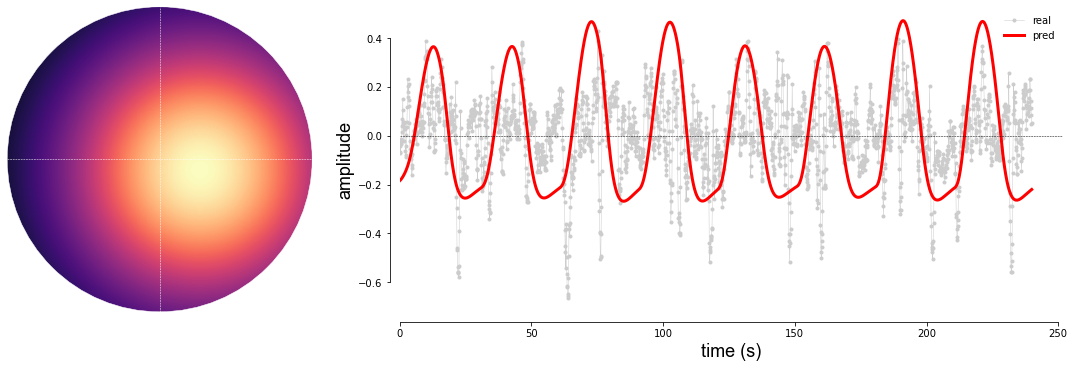

In [74]:
results.plot_prf_timecourse(vox_range=(360,365))

In [71]:
pars,_,_ = results.model_fit.plot_vox(vox_nr=360, model='norm', xkcd=False, title='pars', transpose=False, sns_trim=True, axis_type="time")

IndexError: index 360 is out of bounds for axis 0 with size 58

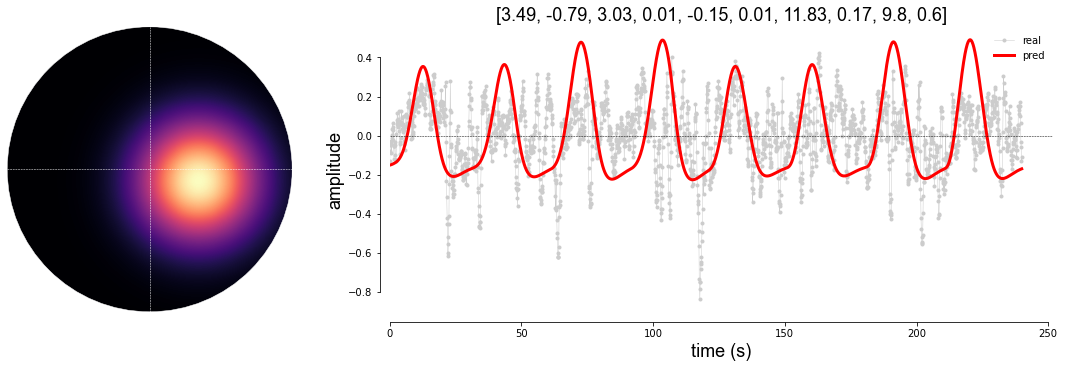

In [69]:
for vox_id in range(50, 51):
    pars,_,_ = results.model_fit.plot_vox(vox_nr=vox_id, model='norm', xkcd=False, title='pars', transpose=False, sns_trim=True, axis_type="time")